In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
info = pd.read_csv('data/info1.csv', encoding='utf-8')
samp_cst_feat = pd.read_csv('data/samp_cst_feat.csv', encoding='ISO-8859-1')
samp_train = pd.read_csv('data/samp_train.csv', encoding='ISO-8859-1')

In [4]:
info

,MRC_ID_DI,Category
0,0,미이용
1,1,홈쇼핑
2,2,종합물
3,3,종합몰
4,4,전문몰
5,5,종합몰
6,6,홈쇼핑
7,7,오픈마켓_소셜
8,8,홈쇼핑
9,9,전문몰


In [5]:
samp_cst_feat

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,...,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,90000000089,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,...,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,90000000176,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,...,-0.23729,0.19437,0.06538,0.16309,0.30207,0.06053,-0.01107,0.12413,0.29702,-0.31717
2,90000000210,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,...,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962
3,90000000212,0.05194,0.7505,0.04611,-0.16512,0.07413,0,0.5322,0.26845,0.7327,...,0.20754,-0.01934,-0.05172,-0.13245,-0.16357,-0.05697,0.01587,-0.04022,0.31213,-0.00559
4,90000000213,-0.08536,0.3767,-0.12288,0.10023,-0.43414,0,0.5468,-0.25575,0.9644,...,-0.42251,0.23122,0.07913,0.09206,0.46971,0.07964,-0.04698,0.03581,0.22588,-0.34868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,90000460112,-0.06606,0.6615,-0.09743,-0.03240,0.10111,0,0.9722,-0.02041,0.6966,...,-0.19780,0.33881,-0.01692,-0.01823,0.21720,-0.08346,-0.07835,0.02321,0.32967,-0.25995
10120,90000460117,-0.03031,0.0143,0.07041,-0.02519,0.58013,0,0.0330,0.06676,0.8251,...,0.09259,-0.19384,-0.02383,-0.02448,-0.05019,-0.02869,-0.05401,0.01670,-0.15880,0.48301
10121,90000460233,-0.05351,0.3121,0.36925,-0.10039,0.51159,0,0.2582,0.35016,0.4638,...,0.46478,-0.45312,-0.17163,-0.08674,-0.40260,-0.15903,-0.10292,-0.11742,-0.31895,0.40357
10122,90000460310,-0.00562,0.2286,0.04581,-0.05390,0.20481,0,0.5957,0.11319,0.2527,...,0.10340,0.01754,-0.01479,-0.03898,-0.01363,0.06974,-0.03815,-0.04371,0.11433,-0.01931


In [6]:
len(samp_train['cst_id_di'].unique())

10124

In [7]:
samp_train

,cst_id_di,MRC_ID_DI
0,90000000089,0
1,90000000176,8
2,90000000210,0
3,90000000212,5
4,90000000213,6
...,...,...
10119,90000460112,7
10120,90000460117,0
10121,90000460233,0
10122,90000460310,0


In [8]:
total_df = samp_cst_feat.copy()
total_df['label'] = samp_train['MRC_ID_DI']
total_df

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,...,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,label
0,90000000089,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,...,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197,0
1,90000000176,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,...,0.19437,0.06538,0.16309,0.30207,0.06053,-0.01107,0.12413,0.29702,-0.31717,8
2,90000000210,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,...,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962,0
3,90000000212,0.05194,0.7505,0.04611,-0.16512,0.07413,0,0.5322,0.26845,0.7327,...,-0.01934,-0.05172,-0.13245,-0.16357,-0.05697,0.01587,-0.04022,0.31213,-0.00559,5
4,90000000213,-0.08536,0.3767,-0.12288,0.10023,-0.43414,0,0.5468,-0.25575,0.9644,...,0.23122,0.07913,0.09206,0.46971,0.07964,-0.04698,0.03581,0.22588,-0.34868,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,90000460112,-0.06606,0.6615,-0.09743,-0.03240,0.10111,0,0.9722,-0.02041,0.6966,...,0.33881,-0.01692,-0.01823,0.21720,-0.08346,-0.07835,0.02321,0.32967,-0.25995,7
10120,90000460117,-0.03031,0.0143,0.07041,-0.02519,0.58013,0,0.0330,0.06676,0.8251,...,-0.19384,-0.02383,-0.02448,-0.05019,-0.02869,-0.05401,0.01670,-0.15880,0.48301,0
10121,90000460233,-0.05351,0.3121,0.36925,-0.10039,0.51159,0,0.2582,0.35016,0.4638,...,-0.45312,-0.17163,-0.08674,-0.40260,-0.15903,-0.10292,-0.11742,-0.31895,0.40357,0
10122,90000460310,-0.00562,0.2286,0.04581,-0.05390,0.20481,0,0.5957,0.11319,0.2527,...,0.01754,-0.01479,-0.03898,-0.01363,0.06974,-0.03815,-0.04371,0.11433,-0.01931,0


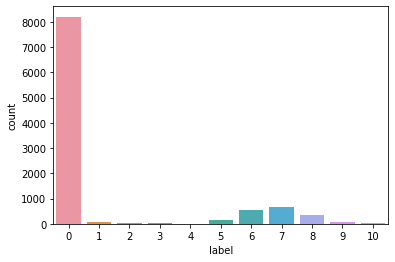

In [9]:
import seaborn as sns
graph = sns.countplot(data = total_df, x = 'label')

In [10]:
open_df = total_df[total_df['label'] == 7]
rest_df = total_df[total_df['label'] != 7]

In [11]:
len(open_df)

661

In [12]:
rest_df = rest_df.sample(frac=1)
new_rest_df = rest_df[:661]

In [13]:
final_df = pd.concat([open_df, new_rest_df])
final_df = final_df.sample(frac=1).reset_index(drop=True)
final_df

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,...,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,label
0,90000079788,-0.02659,0.9342,0.03457,-0.05771,0.28842,0,0.5982,0.05822,0.1930,...,-0.18901,-0.05820,-0.04815,-0.35360,-0.07201,-0.04315,0.61084,-0.12093,0.23211,0
1,90000291195,0.01146,0.4117,-0.05345,0.07674,0.23271,0,0.5863,-0.11316,0.8934,...,0.12698,0.00473,0.05736,0.33877,0.01921,0.13728,0.02384,0.04082,0.37194,7
2,90000086815,-0.05352,0.7164,0.33079,-0.20918,0.31503,0,0.7055,0.41112,0.4649,...,-0.36100,-0.21175,-0.17970,-0.35293,-0.25637,-0.13544,-0.14402,-0.05836,0.24621,7
3,90000290829,0.14679,0.1641,-0.14317,0.13936,-0.06319,0,0.0377,-0.14293,0.8854,...,0.29044,0.05737,0.11903,0.35976,0.02055,0.12850,-0.00270,0.26106,-0.13576,7
4,90000289402,-0.04027,0.6127,-0.10621,0.11567,0.18670,0,0.1929,-0.19603,0.6732,...,0.14185,0.08253,0.12711,0.23319,0.47413,-0.00725,0.01998,0.01613,0.18741,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,90000438556,-0.06729,0.2954,0.00552,0.06104,0.40598,1,0.4169,0.00269,0.2188,...,0.01869,-0.02788,0.04399,-0.07107,-0.04403,-0.04450,-0.01007,-0.04737,0.10297,0
1318,90000449413,-0.00598,0.4008,-0.11227,0.00601,-0.08971,0,0.9462,-0.10342,0.9287,...,0.11616,0.51749,0.01387,0.11987,0.03592,-0.00105,0.38543,0.12762,-0.18102,7
1319,90000224996,0.00518,0.5728,-0.11788,0.12222,0.44116,0,0.1404,-0.18052,0.3473,...,0.15879,0.03873,0.11366,0.29393,0.04151,0.00746,-0.00213,-0.08072,0.19863,0
1320,90000063535,-0.05871,0.0879,-0.01496,-0.07640,0.21761,0,0.4576,0.05420,0.8184,...,0.09308,0.02496,-0.06024,-0.11254,0.05085,-0.07932,0.01064,0.27478,0.06422,7


In [14]:
final_df['label'] = final_df['label'].apply(lambda x: 1 if x==7 else 0)

In [15]:
final_df

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,...,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,label
0,90000079788,-0.02659,0.9342,0.03457,-0.05771,0.28842,0,0.5982,0.05822,0.1930,...,-0.18901,-0.05820,-0.04815,-0.35360,-0.07201,-0.04315,0.61084,-0.12093,0.23211,0
1,90000291195,0.01146,0.4117,-0.05345,0.07674,0.23271,0,0.5863,-0.11316,0.8934,...,0.12698,0.00473,0.05736,0.33877,0.01921,0.13728,0.02384,0.04082,0.37194,1
2,90000086815,-0.05352,0.7164,0.33079,-0.20918,0.31503,0,0.7055,0.41112,0.4649,...,-0.36100,-0.21175,-0.17970,-0.35293,-0.25637,-0.13544,-0.14402,-0.05836,0.24621,1
3,90000290829,0.14679,0.1641,-0.14317,0.13936,-0.06319,0,0.0377,-0.14293,0.8854,...,0.29044,0.05737,0.11903,0.35976,0.02055,0.12850,-0.00270,0.26106,-0.13576,1
4,90000289402,-0.04027,0.6127,-0.10621,0.11567,0.18670,0,0.1929,-0.19603,0.6732,...,0.14185,0.08253,0.12711,0.23319,0.47413,-0.00725,0.01998,0.01613,0.18741,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,90000438556,-0.06729,0.2954,0.00552,0.06104,0.40598,1,0.4169,0.00269,0.2188,...,0.01869,-0.02788,0.04399,-0.07107,-0.04403,-0.04450,-0.01007,-0.04737,0.10297,0
1318,90000449413,-0.00598,0.4008,-0.11227,0.00601,-0.08971,0,0.9462,-0.10342,0.9287,...,0.11616,0.51749,0.01387,0.11987,0.03592,-0.00105,0.38543,0.12762,-0.18102,1
1319,90000224996,0.00518,0.5728,-0.11788,0.12222,0.44116,0,0.1404,-0.18052,0.3473,...,0.15879,0.03873,0.11366,0.29393,0.04151,0.00746,-0.00213,-0.08072,0.19863,0
1320,90000063535,-0.05871,0.0879,-0.01496,-0.07640,0.21761,0,0.4576,0.05420,0.8184,...,0.09308,0.02496,-0.06024,-0.11254,0.05085,-0.07932,0.01064,0.27478,0.06422,1


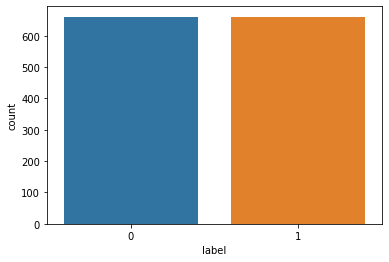

In [16]:
graph = sns.countplot(data = final_df, x = 'label')

In [36]:
final_df.to_csv('wrangled.csv')

In [37]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [38]:
df = final_df.copy()

In [39]:
X = df.drop(['label'], axis = 1)
Y = df['label']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
PCA_df = pd.concat([PCA_df, df['label']], axis = 1)
PCA_df['label'] = LabelEncoder().fit_transform(PCA_df['label'])
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5,label
0,17.974971,2.005443,-2.964428,3.831866,-0.093855,0
1,11.732694,-6.421699,-0.361368,-3.319325,2.225454,0
2,-11.738905,4.612392,3.899151,-0.754158,1.899500,1
3,-9.073265,4.799305,-2.002638,-3.209111,0.905333,0
4,20.518475,9.367520,-0.830263,3.409582,-3.527933,0


In [43]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [48]:
pca = PCA(n_components=5,svd_solver='full')
X_pca = pca.fit_transform(X)
print(pca.explained_variance_)

forest_test(X_pca, Y)

[88.27585199 19.56580448 17.69213219 12.16812907  7.92468798]
1.6551149999999986
[[151  43]
 [ 51 152]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       194
           1       0.78      0.75      0.76       203

    accuracy                           0.76       397
   macro avg       0.76      0.76      0.76       397
weighted avg       0.76      0.76      0.76       397

